# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [9]:
df = pd.read_csv('hasil_clustering.csv')
print(df.head())

                            Date     Open     High      Low    Close  \
0  1970-01-01 00:00:00.020151222  11050.0  11100.0  10925.0  11050.0   
1  1970-01-01 00:00:00.020151223  11050.0  11125.0  10975.0  11100.0   
2  1970-01-01 00:00:00.020151228  11000.0  11450.0  10975.0  11400.0   
3  1970-01-01 00:00:00.020151229  11350.0  11425.0  11325.0  11400.0   
4  1970-01-01 00:00:00.020151230  11450.0  11525.0  11425.0  11425.0   

     Volume  AdjustedClose    Return  Cluster  
0  14565500       2156.073 -0.004505        0  
1   6534000       2165.829  0.004525        0  
2  20106600       2224.365  0.027027        0  
3  11757300       2224.365  0.000000        0  
4  26468300       2229.243  0.002193        0  


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
X = df[['Open', 'High', 'Low', 'Volume']]  # Fitur saham
y = df['Cluster']  # Label hasil clustering

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test_scaled)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Setelah dataset hasil clustering dimuat, fitur harga saham (Open, High, Low) dan volume perdagangan (Volume) dipisahkan sebagai variabel independen (X), sementara label cluster menjadi variabel target (y). Data kemudian dibagi menjadi train (80%) dan test (20%), serta dinormalisasi menggunakan StandardScaler untuk memastikan model bekerja optimal. Random Forest, dengan 100 pohon keputusan, dilatih menggunakan data train untuk menangkap pola dari hasil clustering. Setelah model terbentuk, data test digunakan untuk memprediksi cluster, dan evaluasi dilakukan menggunakan akurasi, classification report, dan confusion matrix. Random Forest mampu mengklasifikasikan data saham dengan baik karena dapat menangani kompleksitas pola harga saham serta memiliki keunggulan dalam mengurangi overfitting melalui mekanisme voting dari banyak pohon keputusan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       346

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



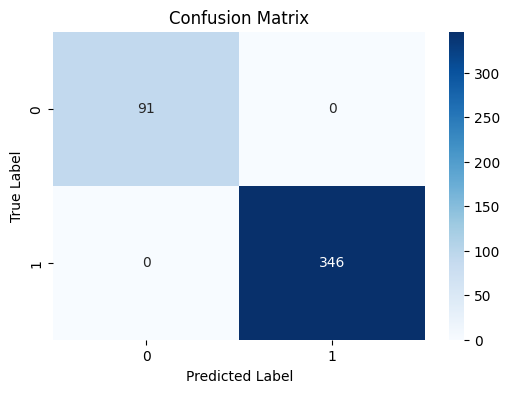

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Hasil classification report menunjukkan bahwa model memiliki akurasi sempurna (100%), yang sering kali menjadi indikasi overfitting—artinya model terlalu menyesuaikan diri dengan data latih dan mungkin tidak akan bekerja sebaik itu pada data baru (real-world). Maka selanjutnya akan membuat hyperparameter tuning

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [21]:
grid_params = {
    'n_estimators': [50, 100, 150],  # Jumlah pohon
    'max_depth': [5, 10, 15],  # Kedalaman maksimal pohon
    'min_samples_split': [5, 10, 20],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 5, 10],  # Minimum sampel dalam setiap daun
    'max_features': ['sqrt', 'log2']  # Jumlah fitur yang dipilih setiap split
}


In [22]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=grid_params,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [24]:
grid_params = {
    'n_estimators': [50, 100, 150],  # Jumlah pohon
    'max_depth': [5, 10, 15],  # Kedalaman maksimal pohon
    'min_samples_split': [5, 10, 20],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 5, 10],  # Minimum sampel dalam setiap daun
    'max_features': ['sqrt', 'log2']  # Jumlah fitur yang dipilih setiap split
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=grid_params,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 1.0


In [26]:
# Model terbaik dari GridSearchCV
best_rf = grid_search.best_estimator_

# Prediksi pada data uji
y_pred_best = best_rf.predict(X_test_scaled)

# Metrik evaluasi
print("\nEvaluasi Model Setelah Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))



Evaluasi Model Setelah Tuning:
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       346

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437


Confusion Matrix:
[[ 91   0]
 [  0 346]]


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [28]:
print("\nAnalisis Hasil Evaluasi:")
# Bandingkan hasil sebelum dan sesudah tuning
initial_accuracy = 1.00  # Sesuai dengan hasil sebelum tuning
final_accuracy = accuracy_score(y_test, y_pred_best)

if final_accuracy > initial_accuracy:
    print("Performanya meningkat setelah tuning.")
elif final_accuracy == initial_accuracy:
    print("Tidak ada perubahan signifikan setelah tuning.")
else:
    print("Performanya menurun setelah tuning, perlu ditinjau kembali.")

# Identifikasi kelemahan model
report = classification_report(y_test, y_pred_best, output_dict=True)
for label, metrics in report.items():
    if isinstance(metrics, dict):
        precision, recall = metrics['precision'], metrics['recall']
        if precision < 0.8 or recall < 0.8:
            print(f"Waspada! Precision ({precision:.2f}) atau Recall ({recall:.2f}) rendah untuk kelas {label}.")


Analisis Hasil Evaluasi:
Tidak ada perubahan signifikan setelah tuning.
